## Import Required Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset in Project

In [3]:
dataset=pd.read_csv("C:\\Users\\91727\\Desktop\\house price prediction\\house_prices_8000.csv")
print(dataset.head())

   id   date_sold       city   neighborhood  zipcode        lat       long  \
0   1  2024-07-10       Pune    Sunset Park   231959  18.470205  73.705468   
1   2  2025-01-17  Bengaluru      Lake View   781156  13.080661  77.621355   
2   3  2021-10-10  Bengaluru    Sunset Park   241933  12.929500  77.506244   
3   4  2016-12-14       Pune    Green Acres   475839  18.504361  73.927946   
4   5  2017-10-28      Delhi  Garden Villas   369179  28.703549  77.235453   

   sqft_living  sqft_lot  bedrooms  ...  grade  sqft_above  sqft_basement  \
0         5419     13269         4  ...      9        4774            645   
1         3989      9364         5  ...      8        2455           1534   
2         3515      6061         3  ...      8        3419             96   
3         4785     18698         5  ...      4        4781              4   
4         2994      5512         4  ...      8        2537            457   

   yr_built  yr_renovated  garage  parking  hoa_monthly     price  \

## Checking Null Values

In [4]:
dataset.isnull().sum()

id                0
date_sold         0
city              0
neighborhood      0
zipcode           0
lat               0
long              0
sqft_living       0
sqft_lot          0
bedrooms          0
bathrooms         0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
garage            0
parking           0
hoa_monthly       0
price             0
price_per_sqft    0
dtype: int64

In [5]:
dataset.nunique()

id                8000
date_sold         3385
city                 7
neighborhood        10
zipcode           7967
lat               7974
long              7983
sqft_living       4282
sqft_lot          6812
bedrooms            10
bathrooms           46
floors               4
waterfront           2
view                 5
condition            5
grade               13
sqft_above        3985
sqft_basement     1865
yr_built           125
yr_renovated       108
garage               4
parking              7
hoa_monthly        503
price             6345
price_per_sqft    7924
dtype: int64

## Handle Missing Values

In [6]:
print("Duplicate rows:", dataset.duplicated().sum())

Duplicate rows: 0


In [7]:
dataset=dataset.drop_duplicates()

## Feature Selection and Data Preparation

In this step, we select the relevant features for predicting house prices and prepare the data for model training. Categorical variables are encoded, and the dataset is split into features (X) and target (y).

In [8]:
# Feature Selection and Data Preparation
X= dataset.drop('price',axis=1)
X=pd.get_dummies(X)
Y=dataset['price']


## Split Data to Train and Test Sets

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Model Training

In [10]:
model=LinearRegression()
model.fit(X_train,Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Model Evaluation

In [11]:
Y_pred=model.predict(X_test)
print("R2 Score:",r2_score(Y_test , Y_pred))
print("Mean Squared Error:",mean_squared_error(Y_test , Y_pred))



R2 Score: 0.9503367527661243
Mean Squared Error: 974488045067.6875


## Visual Representation

C:\Users\91727\AppData\Local\Temp\ipykernel_10392\3650454613.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red')


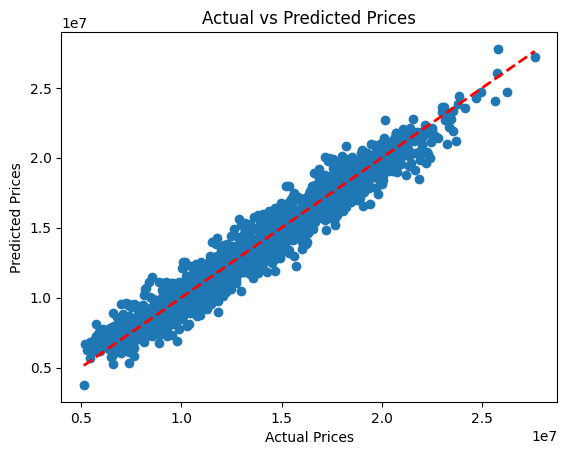

In [12]:
plt.scatter(Y_test , Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red')  
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()  

In [13]:
# If you want to include categorical columns in correlation, encode them first:
corr_data = pd.get_dummies(dataset)
print(corr_data.head())


   id  zipcode        lat       long  sqft_living  sqft_lot  bedrooms  \
0   1   231959  18.470205  73.705468         5419     13269         4   
1   2   781156  13.080661  77.621355         3989      9364         5   
2   3   241933  12.929500  77.506244         3515      6061         3   
3   4   475839  18.504361  73.927946         4785     18698         5   
4   5   369179  28.703549  77.235453         2994      5512         4   

   bathrooms  floors  waterfront  ...  neighborhood_Central Park  \
0        3.4       3           0  ...                      False   
1        1.2       1           0  ...                      False   
2        1.4       2           0  ...                      False   
3        2.7       1           0  ...                      False   
4        1.2       1           0  ...                      False   

   neighborhood_Garden Villas  neighborhood_Green Acres  neighborhood_Hilltop  \
0                       False                     False                

In [14]:
# Save the trained model
import pickle

# Save model to file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("✅ Model saved as model.pkl")


✅ Model saved as model.pkl
